### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

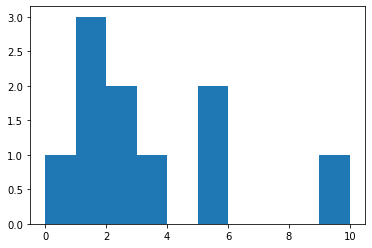

In [9]:
plt.hist(X[1])
plt.show()

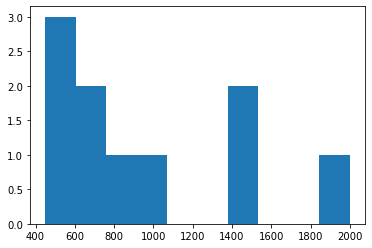

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

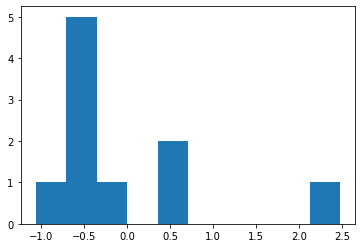

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.18153309  5.01000401  2.79611046  4.5327043 ] 82.42182817089596
200 [55.52942817  5.43630734  2.17148707  4.81172594] 26.974646360733015
300 [56.37128319  5.69321139  1.67395892  5.07602013] 25.623852222794646
400 [56.48292963  5.8592635   1.28193274  5.31875429] 25.36475745949061
500 [56.49773614  5.97072417  0.96987297  5.53171577] 25.208164365932426
600 [56.49969977  6.04839509  0.71963489  5.71364351] 25.105705652023953
700 [56.49996018  6.10443233  0.51793515  5.86654087] 25.038053113805315
800 [56.49999472  6.14609613  0.35477772  5.99371383] 24.99322847842122
900 [56.4999993   6.17784302  0.22247333  6.09878049] 24.963482303221245
1000 [56.49999991  6.20249915  0.11500733  6.18519959] 24.943728141264124


array([56.49999991,  6.20249915,  0.11500733,  6.18519959])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50786654  5.94963354  1.25696817  5.27131083] 13.485603354868678
1000 [56.51045344  6.19117245  0.2158768   6.1064441 ] 12.063031282208213
1500 [56.51055999  6.26946085 -0.15592122  6.41231198] 11.565212021884722
2000 [56.51059862  6.2971835  -0.28953192  6.52262263] 11.388126890660834
2500 [56.51061253  6.30713382 -0.33758965  6.56231983] 11.324728049957507
3000 [56.51061754  6.31071218 -0.35487748  6.57660115] 11.301962907283954
3500 [56.51061934  6.31199939 -0.36109655  6.58173873] 11.293778949233406
4000 [56.51061999  6.31246244 -0.36333379  6.58358691] 11.290835589591325
4500 [56.51062022  6.31262902 -0.3641386   6.58425177] 11.28977684475894
5000 [56.5106203   6.31268895 -0.36442813  6.58449095] 11.289395986073394


array([56.5106203 ,  6.31268895, -0.36442813,  6.58449095])

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

f(x, W) + (lambda_/2) * np.sum(W**2)

In [74]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [23]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [24]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

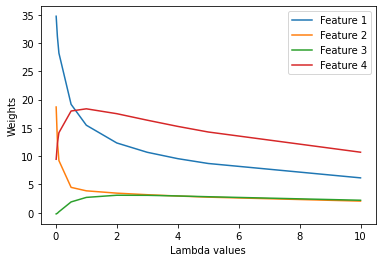

In [35]:
lambda_values = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 10]
weights = []

for l in lambda_values:
    W = eval_model_reg2(X_norm, y, iterations=5000, alpha=1e-2, lambda_=l)
    weights.append(W)

plt.figure()
for i in range(X.shape[0]):
    plt.plot(lambda_values, [w[i] for w in weights], label=f'Feature {i+1}')
plt.xlabel('Lambda values')
plt.ylabel('Weights')
plt.legend()
plt.show()


In [34]:
weights

[array([56.21890547,  6.23067581, -0.16462974,  6.42092637]),
 array([55.12195122,  5.98046248,  0.44885779,  5.93906613]),
 array([53.80952381,  5.73058911,  0.98368306,  5.51609942]),
 array([45.2       ,  4.66118677,  2.40853779,  4.23733841]),
 array([37.66666667,  4.01145689,  2.67324854,  3.68757438]),
 array([28.25      ,  3.27014808,  2.56516043,  3.08230288]),
 array([22.6       ,  2.80240975,  2.34184281,  2.68095822]),
 array([18.83333333,  2.46367479,  2.12976225,  2.37891196]),
 array([16.14285714,  2.20254737,  1.94476797,  2.14020792]),
 array([9.41666667, 1.44984507, 1.33835494, 1.42938586])]

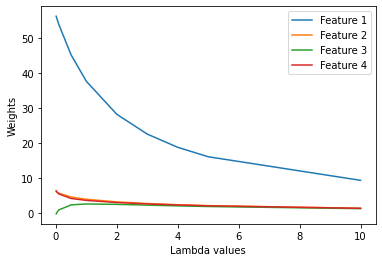

In [37]:
lambda_values = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 10]
weights = []

for l in lambda_values:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    weights.append(W)

plt.figure()
for i in range(X.shape[0]):
    plt.plot(lambda_values, [w[i] for w in weights], label=f'Feature {i+1}')
plt.xlabel('Lambda values')
plt.ylabel('Weights')
plt.legend()
plt.show()


In [38]:
weights

[array([56.21890547,  6.23067581, -0.16462974,  6.42092637]),
 array([55.12195122,  5.98046248,  0.44885779,  5.93906613]),
 array([53.80952381,  5.73058911,  0.98368306,  5.51609942]),
 array([45.2       ,  4.66118677,  2.40853779,  4.23733841]),
 array([37.66666667,  4.01145689,  2.67324854,  3.68757438]),
 array([28.25      ,  3.27014808,  2.56516043,  3.08230288]),
 array([22.6       ,  2.80240975,  2.34184281,  2.68095822]),
 array([18.83333333,  2.46367479,  2.12976225,  2.37891196]),
 array([16.14285714,  2.20254737,  1.94476797,  2.14020792]),
 array([9.41666667, 1.44984507, 1.33835494, 1.42938586])]

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, не рекомендуется одновременно применять нормализацию и стандартизацию к одному и тому же объекту, поскольку эти два метода служат разным целям и дают разные результаты. Нормализация масштабирует данные до определенного диапазона (например, [0, 1]), а стандартизация масштабирует данные так, чтобы среднее значение равнялось нулю, а стандартное отклонение равнялось единице.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [82]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))

    return W

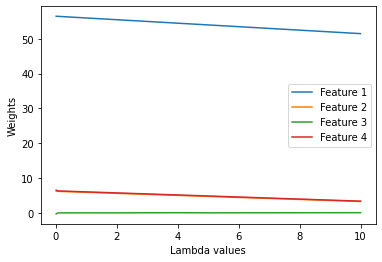

In [83]:
lambda_values = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 10]
weights = []

for l in lambda_values:
    W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    weights.append(W)

plt.figure()
for i in range(X.shape[0]):
    plt.plot(lambda_values, [w[i] for w in weights], label=f'Feature {i+1}')
plt.xlabel('Lambda values')
plt.ylabel('Weights')
plt.legend()
plt.show()


In [84]:
weights

[array([56.495     ,  6.28284243, -0.2967339 ,  6.52797166]),
 array([56.475     ,  6.20195222, -0.05866454,  6.35440696]),
 array([ 5.64500000e+01,  6.17044915e+00, -7.69908164e-04,  6.30016096e+00]),
 array([5.62500000e+01, 6.05332075e+00, 2.18041866e-03, 6.18153919e+00]),
 array([5.60000000e+01, 5.90677320e+00, 8.59251857e-03, 6.03312256e+00]),
 array([ 5.55000000e+01,  5.61533002e+00, -5.62488115e-04,  5.73834416e+00]),
 array([5.50000000e+01, 5.32105828e+00, 3.72282765e-02, 5.44047534e+00]),
 array([5.45000000e+01, 5.02865135e+00, 5.20463369e-02, 5.14490692e+00]),
 array([5.40000000e+01, 4.73738603e+00, 1.54661780e-02, 4.85037030e+00]),
 array([51.5       ,  3.27154553,  0.06266973,  3.36801367])]